<a href="https://colab.research.google.com/github/Woobin-Seo/Python/blob/master/Ipynb/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape :  (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 223us/step - loss: 0.2616 - acc: 0.9198 - val_loss: 0.0594 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0884 - acc: 0.9745 - val_loss: 0.0454 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0657 - acc: 0.9808 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0550 - acc: 0.9832 - val_loss: 0.0370 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0492 - acc: 0.9854 - val_loss: 0.0321 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0416 - acc: 0.9871 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 7/12
60000/60000 [======================

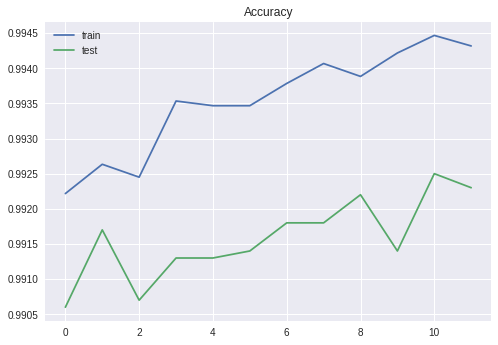

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10 # 0～9までの手書き文字
epochs = 12 # 訓練データを何回繰り返して学習させるのか

img_rows, img_cols = 28, 28

# 学習データとテストデータに分割したデータ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# backendがTensorflowとTheanoで配列のshapeが異なるために2パターン記述
if K.image_data_format() == 'channels_first':
  # 1次元配列に変換
  x_train = x_train.reshape(s_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  # 1次元配列に変換
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# 入力データ[0, 1]の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする
x_train /= 255
x_test /= 255

print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルをバイナリベクトルとして扱う
# Kerasはレベルを数値ではなく、0or1を要素に持つベクトルで扱うため
"""
例えば、サンプルに対するターゲットが「5」の場合次のような形になります。
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNNネットワークの構築
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 損失関数,最適化関数,評価指標を指定してモデルをコンパイル
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 学習済みモデルの保存
model.save('model.h5')

hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs = epochs,
                verbose = 1,
                validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
model.save('model.h5')

import matplotlib.pyplot as plt
# 学習をグラフ化（正解率）
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()